In [59]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Note: UMAP requires: pip install umap-learn
from sklearn.preprocessing import LabelEncoder

try:
    import umap
    UMAP_AVAILABLE = True
except ImportError:
    print("UMAP not available. Install with: pip install umap-learn")
    print("You can skip UMAP and focus on PCA and t-SNE.")
    UMAP_AVAILABLE = False

# Anomaly Detection
from sklearn.ensemble import IsolationForest

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [60]:
df = pd.read_csv('../data/marketing_campaign.csv', sep="\t")
print("✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

# Display first few rows of the dataset
print(f"\nFirst few rows:")
df.head()
print("\nDataset information")
df.info()
print("\nMissing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
df.describe()

✓ Dataset loaded successfully!
Dataset shape: (2240, 29)

First few rows:

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64 

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [61]:
#To remove the NA values
df = df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 2216


In [ ]:
#Encode Categorical columns first
cat_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(cat_cols)}")

if len(cat_cols) > 0:
    LE = LabelEncoder()
    for col in cat_cols:
        df[col] = LE.fit_transform(df[col])
    print("✓ Categorical columns encoded successfully!")

# Remove Outliers using Isolation Forest
print("Outlier Removal")

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(df)
n_outliers = (outlier_labels == -1).sum()

print(f"Found {n_outliers} outliers ({100*n_outliers/len(df):.1f}% of data)")

df = df[outlier_labels == 1].copy()
print(f"Remaining data points: {len(df)}")

# Feature Selection - Keeping high-variance features

# Calculating variance for each feature
variance = df.var()
print("\nFeature variances (sorted):")
print(variance.sort_values(ascending=False))

# Keeping only high-variance features
threshold = variance.quantile(0.25)
features_to_keep = variance[variance > threshold].index.tolist()
df = df[features_to_keep].copy()

print(f"\nKept {len(features_to_keep)} out of {len(variance)} features")
print(f"Features: {features_to_keep}")

Categorical columns: ['Education', 'Marital_Status', 'Dt_Customer']
✓ Categorical columns encoded successfully!

STEP 1: Outlier Removal
Found 111 outliers (5.0% of data)
Remaining data points: 2105

Feature variances (sorted):
Income                 6.001473e+08
ID                     1.056399e+07
MntWines               9.509350e+04
MntMeatProducts        4.255487e+04
Dt_Customer            3.593344e+04
MntFishProducts        2.703631e+03
MntGoldProds           2.446041e+03
MntSweetProducts       1.478695e+03
MntFruits              1.404312e+03
Recency                8.349512e+02
Year_Birth             1.375266e+02
NumStorePurchases      1.042006e+01
NumCatalogPurchases    7.403686e+00
NumWebPurchases        7.225695e+00
NumWebVisitsMonth      5.729898e+00
NumDealsPurchases      3.567266e+00
Education              1.262503e+00
Marital_Status         1.157331e+00
Teenhome               2.952151e-01
Kidhome                2.912823e-01
Response               1.061555e-01
AcceptedCmp3    

In [ ]:
print("Scaling dataset")

scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)
print("✓ Data scaled successfully!")

STEP 3: Scaling
✓ Data scaled successfully!


In [64]:
print("Dataframe to be used for further analysis:")
print(df_scaled.head())

Dataframe to be used for further analysis:
         ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0 -0.024902   -1.010744  -0.350159        0.253091  0.307686 -0.852255   
1 -1.055844   -1.266621  -0.350159        0.253091 -0.173858  1.001047   
2 -0.450512   -0.328406  -0.350159        1.182859  0.857863 -0.852255   
3  0.177593    1.292148  -0.350159        1.182859 -0.978117  1.001047   
4 -0.086451    1.036271   1.430238       -0.676676  0.314014  1.001047   

   Teenhome  Dt_Customer   Recency  MntWines  ...  MntMeatProducts  \
0 -0.962873    -1.312561  0.308203  1.165240  ...         1.918063   
1  0.878042    -0.906263 -0.384110 -0.858769  ...        -0.700254   
2 -0.962873     0.608119 -0.799498  0.487326  ...        -0.113557   
3 -0.962873    -0.684646 -0.799498 -0.858769  ...        -0.632372   
4 -0.962873     0.323183  1.554366 -0.333305  ...        -0.157196   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0         2.640447

K-means Clustering on Cleaned & Scaled Data


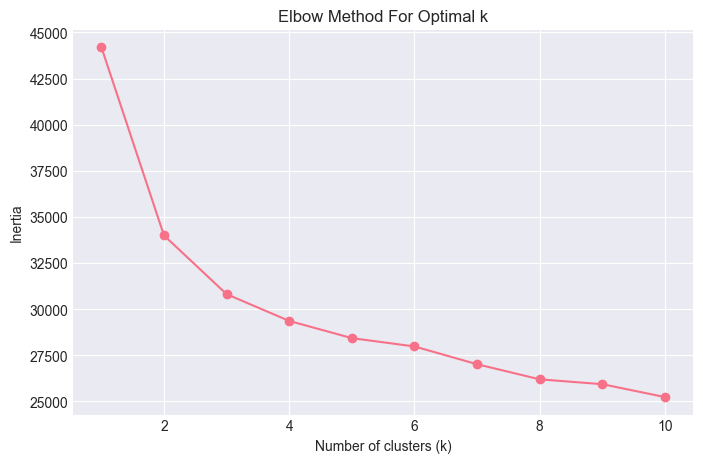

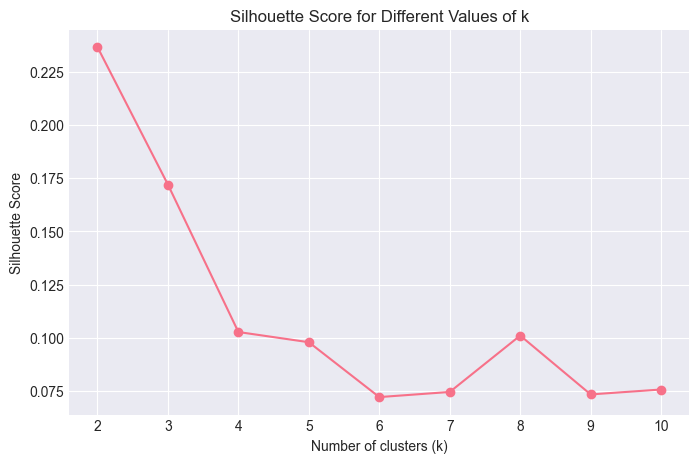


Best silhouette score: 0.237 at k=2


In [65]:
print("K-means Clustering on Cleaned & Scaled Data")

inertia = []
silhouettes = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    silhouettes.append(silhouette_avg)
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouettes, marker='o')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

print(f"\nBest silhouette score: {max(silhouettes):.3f} at k={silhouettes.index(max(silhouettes)) + 2}")